## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

%matplotlib inline

In [2]:
# df = pd.read_csv("./train_dataset_train.csv", nrows = 100000)
df = pd.read_csv("./train_dataset_train.csv")

In [3]:
def modifydata(df):
#     Сделаем категорию **"ticket_type_nm"** ранговой 
    df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
    df["ticket_type_nm"].astype('category').cat.codes
    df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes
    
#     Видоизменим категорию "pass_dttm"
    df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
    df["hours"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

#     Меняем типы, чтобы уменьшить объём занимаемой памяти:
    df['hours'] = df['hours'].astype('int8')
    df['day'] = df['day'].astype('int8')
    df['line_id'] = df['line_id'].astype('int8')
    df['ticket_type_nm'] = df['ticket_type_nm'].astype('int8')
    df['entrance_id'] = df['entrance_id'].astype('int16')
    df['entrance_id'] = df['entrance_id'].astype('int16')

    df['time'] = pd.to_datetime(df['pass_dttm'])
    df['time_isweekend'] = (df['time'].dt.dayofweek // 5 == 1).astype('int8')
    df['time_dayofweek'] = df['time'].dt.dayofweek.astype('int8')

    df = df[df["time_to_under"] < 900]
    
    return df

In [4]:
df = modifydata(df)

## Рассмотрим датасет по ближе

In [67]:
df.head(3)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours,time,time_isweekend,time_dayofweek
0,1,40BD89EC85646EFB69E283F39C298E60,40,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5,2022-09-12 05:00:13,0,0
1,2,126727A96489CC976A8C08E5CEB00542,53,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5,2022-09-12 05:00:54,0,0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5,2022-09-12 05:00:55,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091021 entries, 0 to 1091020
Data columns (total 12 columns):
id                1091021 non-null int64
ticket_id         1091021 non-null object
ticket_type_nm    1091021 non-null object
entrance_id       1091021 non-null int64
entrance_nm       1091021 non-null object
station_id        1091021 non-null int64
station_nm        1091021 non-null object
line_id           1091021 non-null int64
line_nm           1091021 non-null object
pass_dttm         1091021 non-null object
time_to_under     1091021 non-null float64
label             1091021 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 99.9+ MB


In [5]:
df.describe()

,id,entrance_id,station_id,line_id,time_to_under,label
count,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06
mean,5.455110e+05,8.581884e+02,8.601452e+03,8.590013e+00,5.104668e+02,7.723527e+03
std,3.149508e+05,9.003577e+02,1.247133e+04,1.247157e+01,2.328452e+02,1.167015e+04
min,1.000000e+00,2.000000e+01,1.002000e+03,1.000000e+00,3.001667e+01,1.002000e+03
25%,2.727560e+05,2.150000e+02,3.018000e+03,3.000000e+00,3.229500e+02,3.006000e+03
50%,5.455110e+05,3.370000e+02,7.009000e+03,7.000000e+00,5.686833e+02,6.013000e+03
75%,8.182660e+05,2.087000e+03,9.022000e+03,9.000000e+00,6.838833e+02,9.012000e+03
max,1.091021e+06,2.466000e+03,8.101600e+04,8.100000e+01,1.437417e+03,8.101600e+04


Посмотрим на распределение двух основных величин 

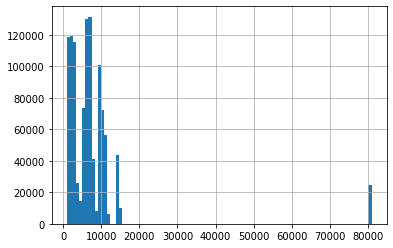

In [6]:
df["label"].hist(bins = 100)

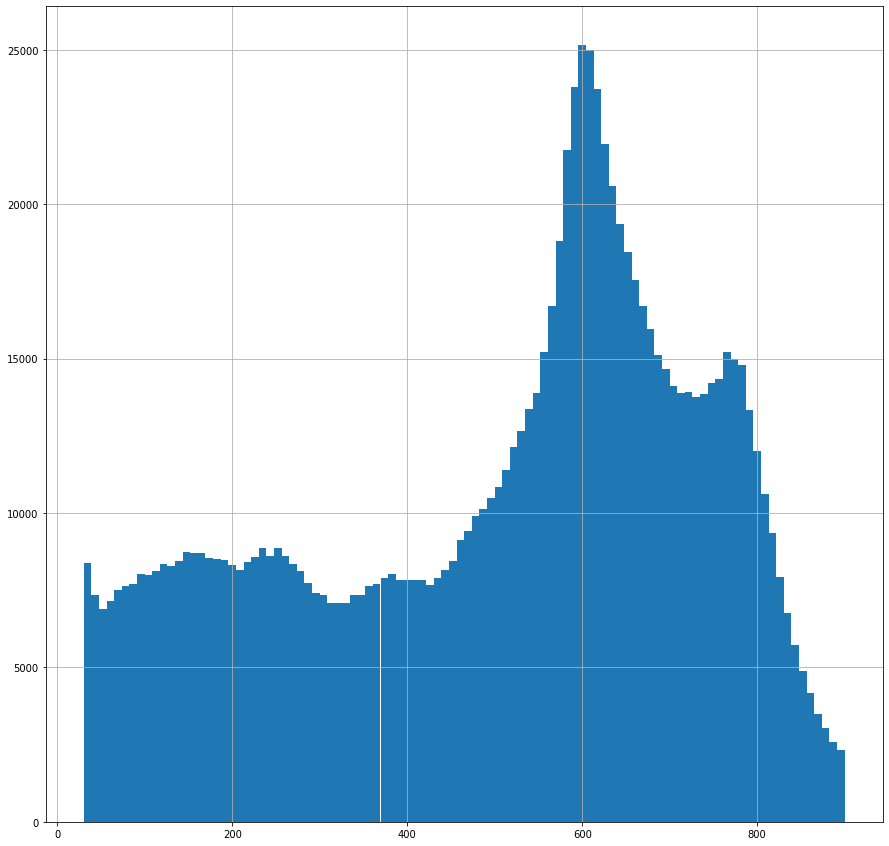

In [66]:
# df1 = df[df["time_to_under"] < 900]
# df1["time_to_under"].hist(bins = 100)

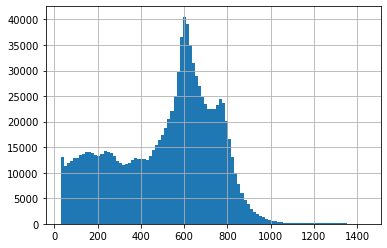

In [7]:
df["time_to_under"].hist(bins = 100)

Найдем наиболее популярную станцию и посмотрим инфо по ней:

In [8]:
df["label"].value_counts()

3002     17272
6008     15541
1022     13758
5010     13122
7022     13080
         ...  
13002       24
13003       23
13006       17
13005       14
13004        7
Name: label, Length: 276, dtype: int64

In [10]:
# df["label"].value_counts().index[0]   # номер станции

df[df["label"] == int(df["label"].value_counts().index[1])].head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
34,35,EAF4CE70898C3FCC7DC0453607054840,30 дней СК учащегося,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:16:20,955.400000,6008
64,65,8BE033F1D958FF1E53F97121D51DE779,30 дней,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:54,834.216667,6008
177,178,87ED9A7A8E1A46E32C08239A7FA930B9,КОШЕЛЕК,276,Новые Черёмушки (Южный),6013,Новые Черёмушки,6,Калужско-Рижская,2022-09-12 05:26:21,1057.950000,6008
181,182,B00FE04CA3D4F54DA324610741E5A7A0,Социальная карта москвича,242,Ботанический сад (Северный),6005,Ботанический сад,6,Калужско-Рижская,2022-09-12 05:26:31,124.616667,6008
626,627,54A042D2EF6DDFE9D444CCD8BB42AC0F,Социальная карта москвича,2214,Шелепиха (Первый),11005,Шелепиха,11,Большая кольцевая,2022-09-12 05:31:39,561.316667,6008


### **"ticket_type_nm"** 


In [11]:
df["ticket_type_nm"].value_counts()

КОШЕЛЕК                                                   262499
30 дней ЕДИНЫЙ ТК                                         177041
Социальная карта москвича                                 127022
30 дней                                                   117064
90 дней ЕДИНЫЙ ТК                                          58071
30 дней СК студента                                        48658
60 поездок ЕДИНЫЙ ТК                                       46542
30 дней Пригород ТК                                        45381
СК студента 30 дней                                        39395
ББК                                                        29674
30 дней СК учащегося                                       24307
365 дней ЕДИНЫЙ ТК                                         20859
СК учащегося 30 дней                                       16933
Социальная карта жителя Моск. области                      15551
90 дней                                                    12817
Пропуск FacePay          

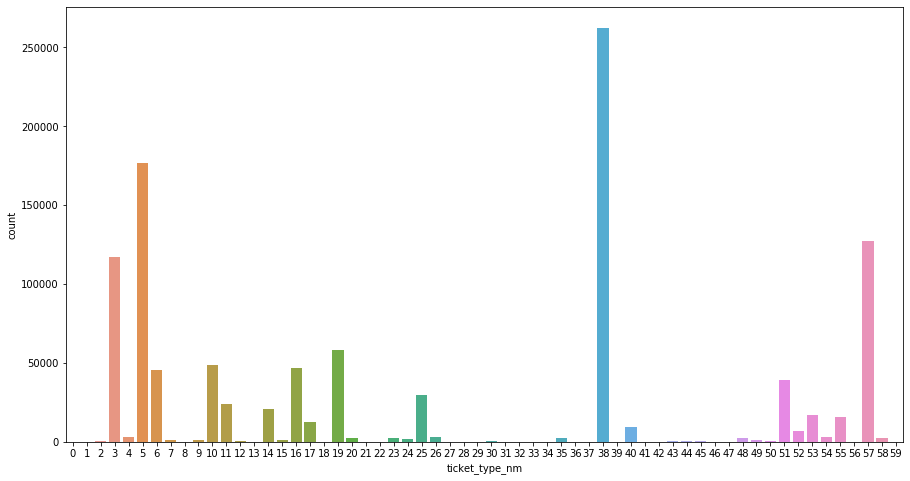

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x = "ticket_type_nm" , data  = df)  

Кажется нет четкой зависимости между категорией билета и временем между заходи на станцию

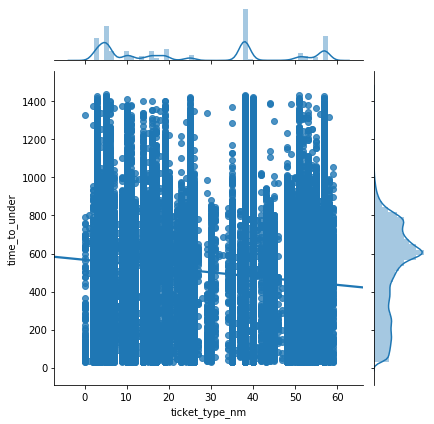

In [26]:
sns.jointplot(x = "ticket_type_nm", y = 'time_to_under', data = df, kind = 'reg')

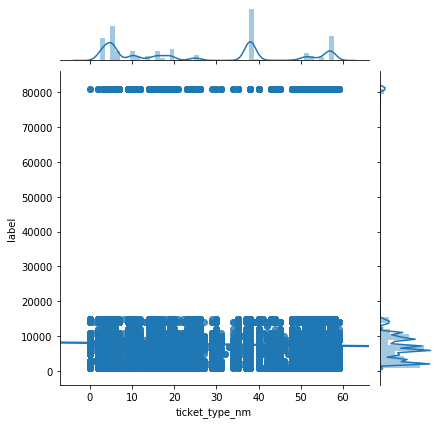

In [51]:
sns.jointplot(x = "ticket_type_nm", y = 'label', data = df, kind = 'reg')

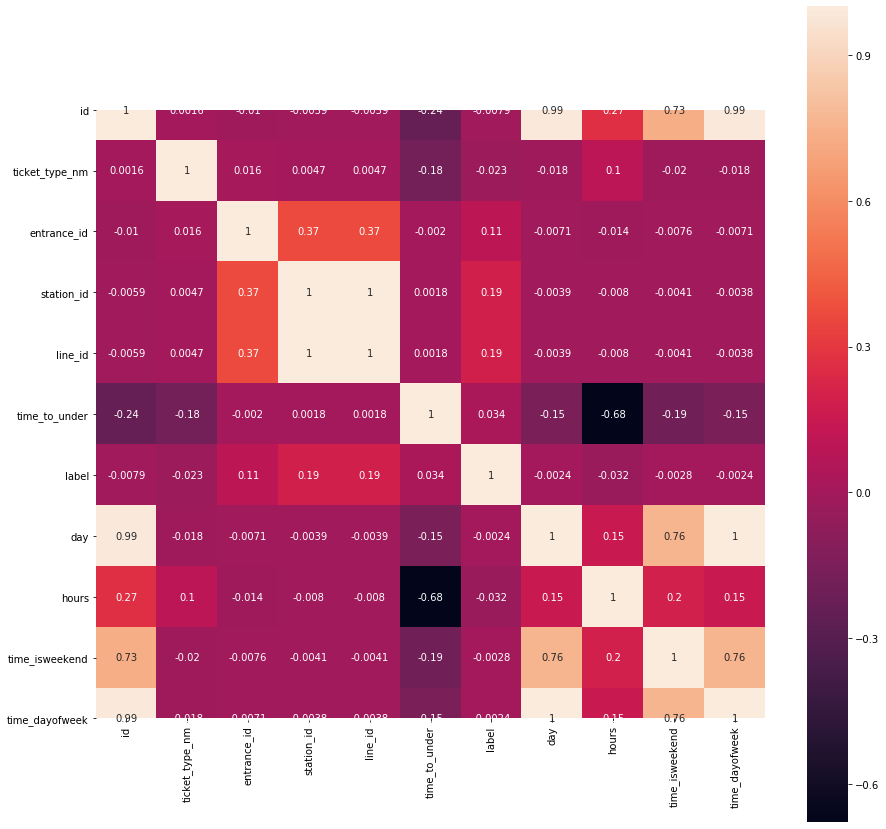

In [50]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [45]:
# df['day'].unique()
df_dpi['time_dayofweek'] = df_dpi['time'].dt.dayofweek.astype('int8')

array([12, 13, 14, 15, 16, 17, 18, 19])

In [46]:
df['time'] = pd.to_datetime(df['pass_dttm'])
df['time_isweekend'] = (df['time'].dt.dayofweek // 5 == 1).astype('int8')
df['time_dayofweek'] = df['time'].dt.dayofweek.astype('int8')

In [48]:
 df['hours'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23,  0,  1,  2,  3,  4])

## Выделим выборки

In [5]:
X = df.drop(["ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm", "label","time_to_under", 'time'], axis = 1)
y = df[["time_to_under", "label"]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.columns

Index(['id', 'ticket_type_nm', 'entrance_id', 'station_id', 'line_id', 'day',
       'hours', 'time_isweekend', 'time_dayofweek'],
      dtype='object')

In [7]:
X.head()

,id,ticket_type_nm,entrance_id,station_id,line_id,day,hours,time_isweekend,time_dayofweek
0,1,40,2402,11007,11,12,5,0,0
1,2,53,110,2006,2,12,5,0,0
2,3,26,110,2006,2,12,5,0,0
5,6,51,103,2003,2,12,5,0,0
6,7,40,2258,15001,15,12,5,0,0


In [8]:
y_train

,time_to_under,label
283040,668.000000,3008
403647,650.050000,5001
624556,407.766667,1018
503607,56.566667,5002
366572,728.366667,6010
...,...,...
112163,571.183333,6015
263218,780.283333,9015
133827,551.100000,1017
681626,505.200000,6014


## Обучение модели

Для станции 

In [11]:
datalen = y_train.shape[0]
chunksize = 10000

In [14]:
# %%time

# clf = RandomForestClassifier(random_state=0, max_depth=15, n_jobs=1, warm_start=True)
# clf.fit(X_train[:chunksize], y_train["label"][:chunksize])

# i = 0
# while i < datalen:
#     clf.fit(X_train[i:i+chunksize], y_train["label"][i:i+chunksize])
#     i = i + chunksize


In [9]:
%%time

clf = RandomForestClassifier(random_state=0, max_depth=10, n_estimators=200, n_jobs=2)
clf.fit(X_train, y_train["label"])

# festo ~4min  n_jobs=2

CPU times: user 6min 45s, sys: 2min 1s, total: 8min 46s
Wall time: 2min 45s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
# import pickle

# with open('./clf.data', 'wb') as f:
#     pickle.dump(clf, f)

In [11]:
%%time
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)
clf.fit(X_train, y_train["label"])


/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 1.64 s, sys: 175 ms, total: 1.81 s
Wall time: 12min 3s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

Для времени

In [10]:
%%time
reg = RandomForestRegressor(random_state=0, max_depth=15, n_estimators=200, n_jobs=-1)

reg.fit(X_train, y_train["time_to_under"])

# фесто 45с n_jobs=-1

CPU times: user 20min 7s, sys: 452 ms, total: 20min 7s
Wall time: 2min 33s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
# import pickle

# with open('./reg.data', 'wb') as f:
#     pickle.dump(reg, f)

In [20]:
%%time 

from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train["time_to_under"])

CPU times: user 353 ms, sys: 23.3 ms, total: 376 ms
Wall time: 94.3 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## Оценка точности

In [11]:
pred_class = clf.predict(X_test)
pred_reg = reg.predict(X_test)

In [16]:
from sklearn.metrics import recall_score, r2_score

rs = recall_score(y_test["label"], pred_class , average='macro')
r2 = r2_score(y_test["time_to_under"], pred_reg)
score = 0.5 * rs +  0.5 * r2

print(rs, r2, score)

0.051367635290150336 0.5337106363746371 0.2925391358323937


In [ ]:
# 0.4897555334746157   -- baseline
# 0.2678758686368177   -- baseline, обучение на всех данных.  На паблике 0.092150
# 0.0028946815886393275 0.4765418328846045 0.2397182572366219   -- logit, linreg  public  -0.177917
# 0.051367635290150336 0.5337106363746371 0.2925391358323937 -- RandomForestClassifier, RandomForestRegressor

### classification_report

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test["label"], pred_class))

/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        1002       0.00      0.00      0.00       846
        1003       0.12      0.05      0.07       974
        1004       0.00      0.00      0.00       811
        1005       0.04      0.02      0.03      1400
        1006       0.00      0.00      0.00      1690
        1007       0.00      0.00      0.00      1877
        1008       0.06      0.01      0.02      1683
        1009       0.05      0.05      0.05      3765
        1011       0.11      0.02      0.03      1941
        1012       0.33      0.00      0.00      1208
        1013       0.50      0.00      0.00       863
        1014       0.12      0.13      0.13      1249
        1015       0.08      0.01      0.01      1614
        1016       0.13      0.00      0.01      1886
        1017       0.00      0.00      0.00       858
        1018       0.11      0.18      0.13      2714
        1019       0.31      0.02      0.04      2260
        1020       0.00    

In [65]:
# классы, которые плохо прогнозируются

from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test["label"], pred_class)

inds_classes = sorted(y_test["label"].unique())   #  список классов

inds = []
for i in range(len(mcm)):
    if mcm[i][1,1] <= 1:
        inds.append(inds_classes[i])
#     print(mcm[i][1,1])

print(len(inds),'/',len(inds_classes))

110 / 276


# Submit

In [ ]:
clf.fit([X_train, X_test], [y_train["label"], y_test['label']])
reg.fit([X_train, X_test], [y_train["label"], y_test['label']])

In [24]:
valid = pd.read_csv("./test_dataset_test.csv")

valid = modifydata(valid)

# valid["ticket_type_nm"] = pd.Categorical(valid["ticket_type_nm"])
# valid["ticket_type_nm"].astype('category').cat.codes
# valid["ticket_type_nm"] = valid["ticket_type_nm"].cat.codes
# valid["day"] = valid.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
# valid["hours"] = valid.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

X = valid.drop(["ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm"], axis = 1)

pred_class = clf.predict(X)
pred_reg = reg.predict(X)

In [25]:
# submit_df = pd.DataFrame([valid.id, pred_reg, pred_class], columns=['id', 'time_to_under', 'label'])
submit_df = pd.DataFrame(columns=['id', 'time_to_under', 'label'], index=None)
# submit_df.set_index('id', inplace=True)

submit_df['id'] = valid['id']
submit_df['time_to_under'] = pred_reg
submit_df['label'] = pred_class

submit_df.to_csv('submit.csv', index=False)

submit_df.head()



,id,time_to_under,label
0,1091022,448.461948,9015
1,1091023,445.436170,9015
2,1091024,430.422481,9015
3,1091025,448.329444,9015
4,1091026,448.460924,9015
